In [4]:
import numpy as np
import mcm_lib_pbc as mc
import matplotlib.pyplot as plt
import random
import time as time
from StringIO import StringIO
import scipy.optimize as opt
import ipdb
import os
from matplotlib.axes import Axes as ax
from numpy.random import choice
import imp
import matplotlib.cm as cm
from IPython.display import display, Markdown
import sympy
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})

In [2]:
reload(mc)
name_list = [
    'monovalent',
    'bivalent_close',
    'bivalent_far',
    'obtuse_triangle',
    'equilateral_triangle_far',
    'trapezoid',
    'rectangle_far',
    'pentagon',
    'hexagon',
    'square',
    'dominan_control_001',
    'wheel',
    'arbitrary_pentamer',
    'wheel 1',
    'wheel 2',
    'wheel 3',
    'wheel 4',
    'wheel 5',
    'wheel 6',
    'wheel 7',
    'wheel 8',
    'wheel 9',
    'wheel 10',
    'wheel 11',
    'wheel 12',
    'large square lattice',
    'small square lattice',
    "gradient",
    "gradient_long",
    "gradient_short",
    "long_spacing",
    "short_spacing",
    "interface"

]

In [9]:
coordinates_list = [
    [[7.5, 0]], #monovalent 0
    [[7.5, 0], [22.5, 0]], #bivalent_close 1
    [[7.5, 0], [7.5, 2 * 7.5 * np.sqrt(3)]], #bivalent_far 2
    [[7.5, 0], [22.5, 0], [30, 7.5 * np.sqrt(3)]], #obtuse triangle 3
    [[7.5, 0], [7.5, 2 * 7.5 * np.sqrt(3)], [30, 7.5 * np.sqrt(3)]], #equilateral triangle 4
    [[0, 7.5 * np.sqrt(3)], [7.5, 0], [22.5, 0], [30, 7.5 * np.sqrt(3)]], # trapezoid 5
    [[7.5, 0], [22.5, 0], [7.5, 2 * 7.5 * np.sqrt(3)], [22.5, 2 * 7.5 * np.sqrt(3)]], #rectangle far 6
    [[0, 7.5 * np.sqrt(3)], [7.5, 0], [22.5, 0], [30, 7.5 * np.sqrt(3)], [7.5, 2 * 7.5 * np.sqrt(3)]], #pentagon 7
    [[0, 7.5 * np.sqrt(3)], [7.5, 0], [22.5, 0], [30, 7.5 * np.sqrt(3)], [7.5, 2 * 7.5 * np.sqrt(3)],
     [22.5, 2 * 7.5 * np.sqrt(3)]], #hexagon 8
    [[0, 0], [0, 7.5 * np.sqrt(3)], [7.5 * np.sqrt(3), 0], [7.5 * np.sqrt(3), 7.5 * np.sqrt(3)]], #square 9
    [[7.5, 0], [7.5, 15], [7.5, 7.5 * 2 * np.sqrt(3) + 15], [15, 7.5 * np.sqrt(3) + 15],
     [7.5, 7.5 * 2 * np.sqrt(3) + 30], [30, 7.5 * np.sqrt(3) + 15], [45, 7.5 * np.sqrt(3) + 15],
     [60, 7.5 * np.sqrt(3) + 15]], #dominan control 001 10
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732], [22.94967, -13.25], [26.5, 0], [22.94967, 13.25], [13.25, 22.9496732]], #wheel 11
    [[0, 0], [0, 15], [3, 11], [20, 6], [26, 30]], #arbitrary pentameter 12
    [[0, 26.5]], #wheel 1 13
    [[0, 26.5], [-13.25, 22.9496732]], #wheel 2
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25]], #wheel 3
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0]], #wheel 4
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25]], #wheel 5
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732]], #wheel 6
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5]],  #wheel 7
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732]], #wheel 8
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732], [22.94967, -13.25]], #wheel 9
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732], [22.94967, -13.25], [26.5, 0]], #wheel 10
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732], [22.94967, -13.25], [26.5, 0], [22.94967, 13.25]], #wheel 11
    [[0, 26.5], [-13.25, 22.9496732], [-22.9496, 13.25], [-26.5, 0], [-22.9496, -13.25], [-13.25, -22.9496732],
     [0, -26.5], [13.25, -22.9496732], [22.94967, -13.25], [26.5, 0], [22.94967, 13.25], [13.25, 22.9496732]], #wheel 12 24
    [[0.,16.]   ,[0.,32.]   ,[0.,48.]   ,[0.,64.] ,[0.,80.],[0.,96.],[0.,112.],[0.,128.],           #square lattice 25
     [16.,16.]  ,[16.,32.]  ,[16.,48.]  ,[16.,64.],[16.,80.],[16.,96.],[16.,112.],[16.,128.],
     [32.,16.]  ,[32.,32.]  ,[32.,48.]  ,[32.,64.],[32.,80.],[32.,96.],[32.,112.],[32.,128.],
     [48.,16.]  ,[48.,32.]  ,[48.,48.]  ,[48.,64.],[48.,80.],[48.,96.],[48.,112.],[48.,128.],
     [64.,16.]  ,[64.,32.]  ,[64.,48.]  ,[64.,64.],[64.,80.],[64.,96.],[64.,112.],[64.,128.],
     [80.,16.]  ,[80.,32.]  ,[80.,48.]  ,[80.,64.] ,[80.,80.],[80.,96.],[80.,112.],[80.,128.],
     [96.,16.]  ,[96.,32.]  ,[96.,48.]  ,[96.,64.] ,[96.,80.],[96.,96.],[96.,112.],[96.,128.],
     [112.,16.] ,[112.,32.] ,[112.,48.] ,[112.,64.] ,[112.,80.],[112.,96.],[112.,112.],[112.,128.],
     [128.,16.] ,[128.,32.] ,[128.,48.] ,[128.,64.] ,[128.,80.],[128.,96.],[128.,112.],[128.,128.],
     ],

    [[0., 0.], [0., 16.], [0., 32.],   # square lattice 26
     [16., 0.], [16., 16.], [16., 32.],
     [32., 0.], [32., 16.], [32., 32.]],
    
    [[0,0],[0,21.1],[0,41.4],[0,57.9],[0,73.6],[0,87.5],[0,99.6],[0,109.9]][::-1],
    [[0,0]]+[[0,y] for y in np.cumsum(np.arange(8,28,2.)[::-1])],
    [[0,0]]+[[0,y] for y in np.cumsum(np.arange(8,28,4.))],
    [[0,0]]+[[0,y] for y in np.cumsum(np.ones(20)*22)],
    [[0,0]]+[[0,y] for y in np.cumsum(np.ones(20)*10)],
    
    [[20,10],  [20,20],  [30,35],  [30,50],
     [10,10],  [10,20],  [15,35],  [15,50],
     [0,10],   [0,20],   [0,35],   [0,50],
     [-10,10], [-10,20], [-15,35], [-15,50],
     [-20,10], [-20,20], [-30,35], [-30,50],
    ]
]



## plans
- first thing's first, do we need to update the distance dependence function?

- take a look at individual trajectories
- what is the net movement of single trajectories
- can we store this net movement variable as a number for each trajectory
- then can we get an average net movement for all trajectories
- we can use this to show persistence
- how to deal with periodicity though? in microscopic movements perhaps , we simply sum up all of the moves

- what about location - we have trajectories which give us locations
- can we put this location into a 2d histogram?
- how do we deal with periodicity in the case of location? we need to again think in terms of single movements I think, and have a talley, which ignores periodic transitions and just keeps track of the global location if the particle had not had any boundaries

- what about speed - is this information redundant? we have something that

- walk speed is determined by our choice of kmb and kbm - 
- are the hexagons able to determine the kmb and kbm parameters?
    - that would be very interesting to show - that we can in fact tease out not just kd2 but the individual rates.
    - low Kd2 can be the result of either slow dissocation or fast association
    - consider a triangle

  0%|          | 0/200 [00:00<?, ?it/s]

('gradient_long', [[0, 0], [0, 26.0], [0, 50.0], [0, 72.0], [0, 92.0], [0, 110.0], [0, 126.0], [0, 140.0], [0, 152.0], [0, 162.0], [0, 170.0]])
gradient_long


100%|██████████| 200/200 [32:35<00:00,  9.78s/it]


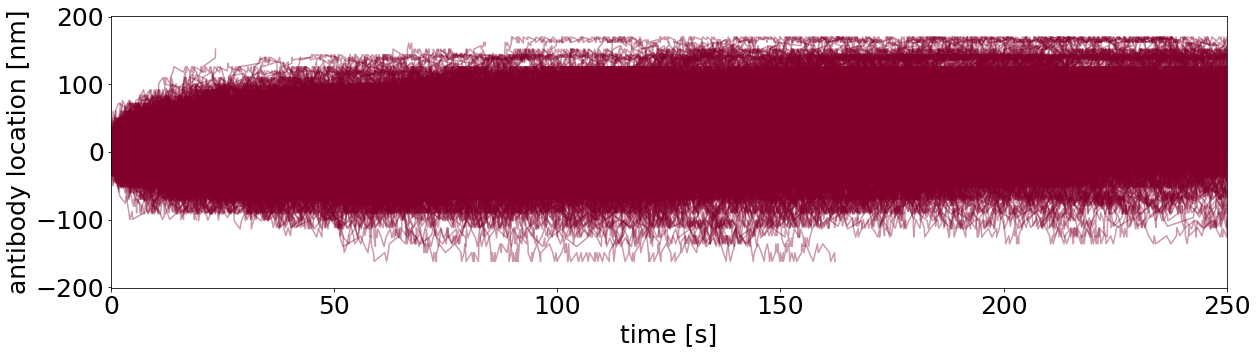

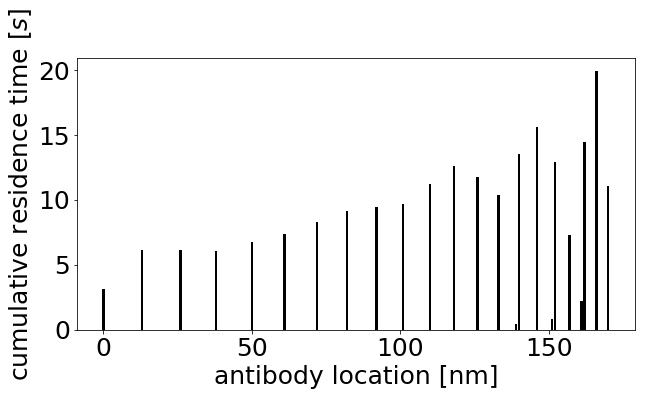

('average velocity: ', 0.23038619277623096)


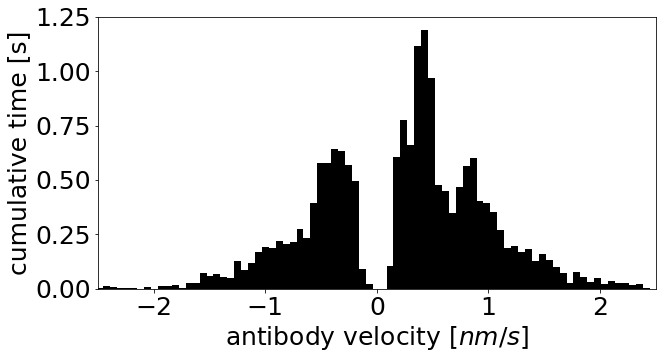

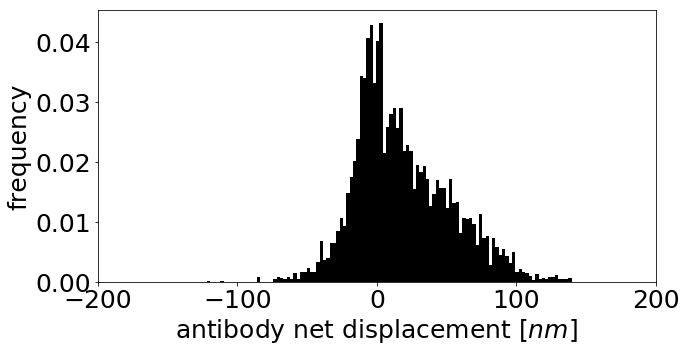

('average net displacement: ', 18.33912185670062)


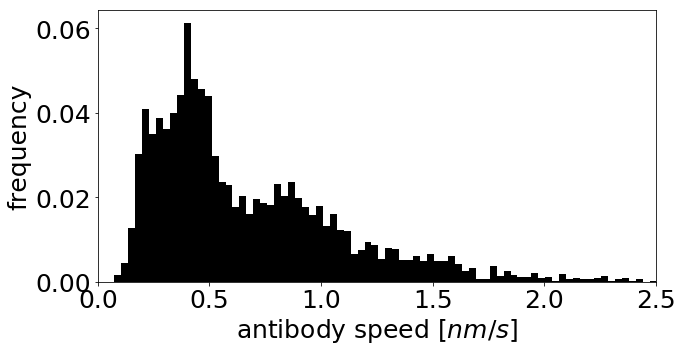

In [6]:
# gradient short #####
imp.reload(mc)
experiment = 28
print(name_list[experiment],coordinates_list[experiment])
# box_size=np.max(np.cumsum(np.arange(15,25,.5)))+24
# box_size=np.max(np.cumsum(np.arange(15,25,.2)))+25
box_size = np.max(coordinates_list[experiment])+31
# box_size = np.max(coordinates_list[experiment])+10
origami = mc.Pattern(name = name_list[experiment],coordinates = np.array(coordinates_list[experiment]))
distance_matrix = origami.configure_ab_ag_system_pbc(cutoff_distance = 30, box_size=box_size)
origami.output_site_configuration()
dir = mc.get_save_directory(name = origami.name)
final_time = 10000
times = np.array([0, final_time])
concentrations = np.array([.25e-9])
origami.program_kinetics(times, concentrations)
origami.initialize_antibody_environment([0.02132598797*10**9,0.0005306938,2.66927399416,0.19781887754],dir)
repeats = 200
origami.multirun(repeats)
mc.analyze_ab_position(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
# mc.analyze_ab_position(name_list[experiment], 2, coordinates_list[experiment],box_size)

  0%|          | 0/15 [00:00<?, ?it/s]

('gradient_short', [[0, 0], [0, 8.0], [0, 20.0], [0, 36.0], [0, 56.0], [0, 80.0]])
gradient_short


100%|██████████| 15/15 [01:12<00:00,  4.81s/it]


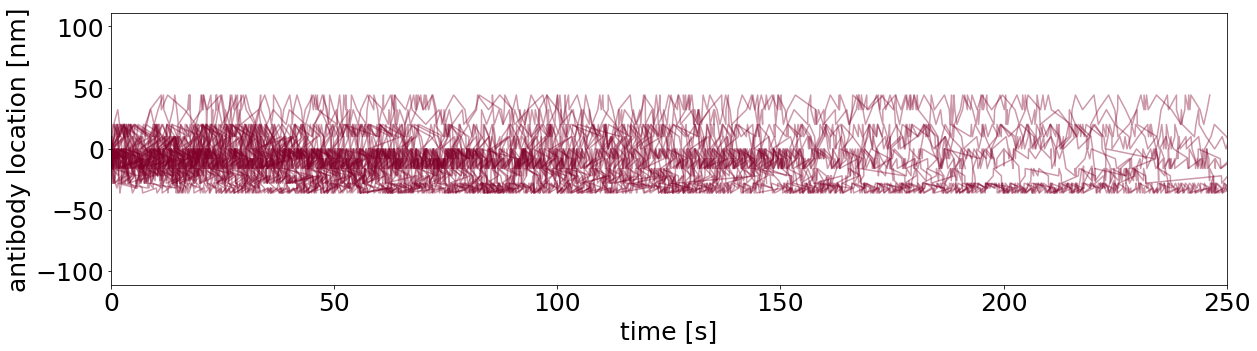

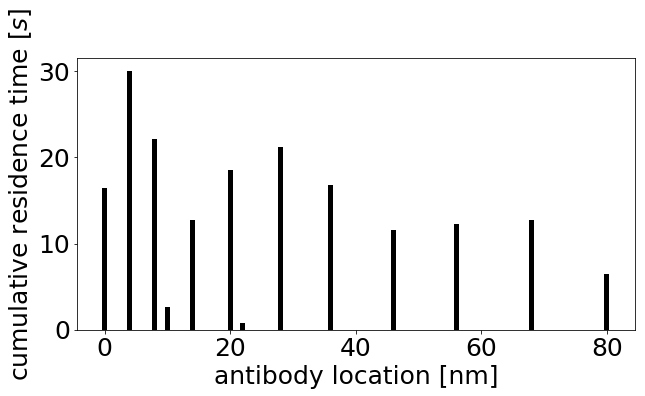

('average velocity: ', -0.19997963077021277)


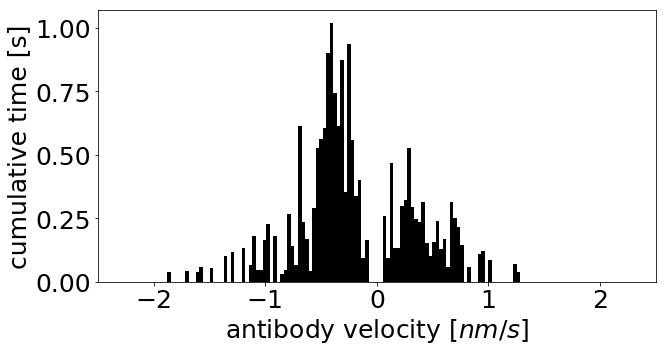

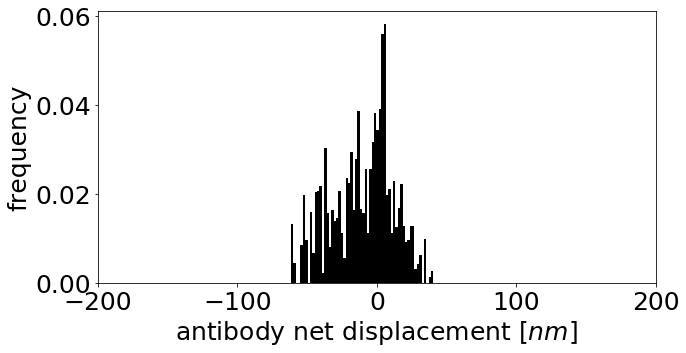

('average net displacement: ', -10.158592521875203)


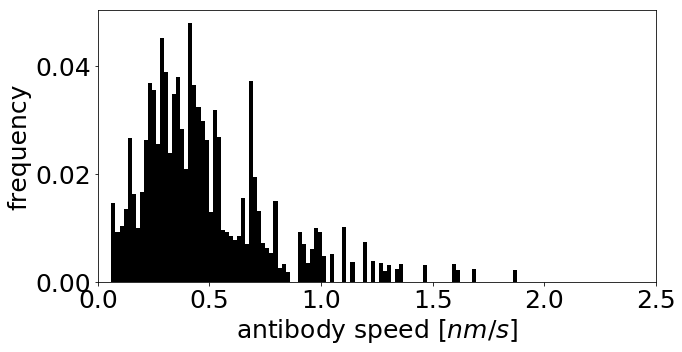

In [258]:
# gradient short #####
imp.reload(mc)
experiment = 29
print(name_list[experiment],coordinates_list[experiment])
# box_size=np.max(np.cumsum(np.arange(15,25,.5)))+24
# box_size=np.max(np.cumsum(np.arange(15,25,.2)))+25
box_size = np.max(coordinates_list[experiment])+31
# box_size = np.max(coordinates_list[experiment])+10
origami = mc.Pattern(name = name_list[experiment],coordinates = np.array(coordinates_list[experiment]))
distance_matrix = origami.configure_ab_ag_system_pbc(cutoff_distance = 30, box_size=box_size)
origami.output_site_configuration()
dir = mc.get_save_directory(name = origami.name)
final_time = 10000
times = np.array([0, final_time])
concentrations = np.array([.25e-9])
origami.program_kinetics(times, concentrations)
origami.initialize_antibody_environment([0.02132598797*10**9,0.0005306938,2.66927399416,0.19781887754],dir)
repeats = 15
origami.multirun(repeats)
mc.analyze_ab_position(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
# mc.analyze_ab_position(name_list[experiment], 2, coordinates_list[experiment],box_size)

  0%|          | 0/100 [00:00<?, ?it/s]

('long_spacing', [[0, 0], [0, 22.0], [0, 44.0], [0, 66.0], [0, 88.0], [0, 110.0], [0, 132.0], [0, 154.0], [0, 176.0], [0, 198.0], [0, 220.0], [0, 242.0], [0, 264.0], [0, 286.0], [0, 308.0], [0, 330.0], [0, 352.0], [0, 374.0], [0, 396.0], [0, 418.0], [0, 440.0]])
long_spacing


100%|██████████| 100/100 [40:01<00:00, 24.01s/it]


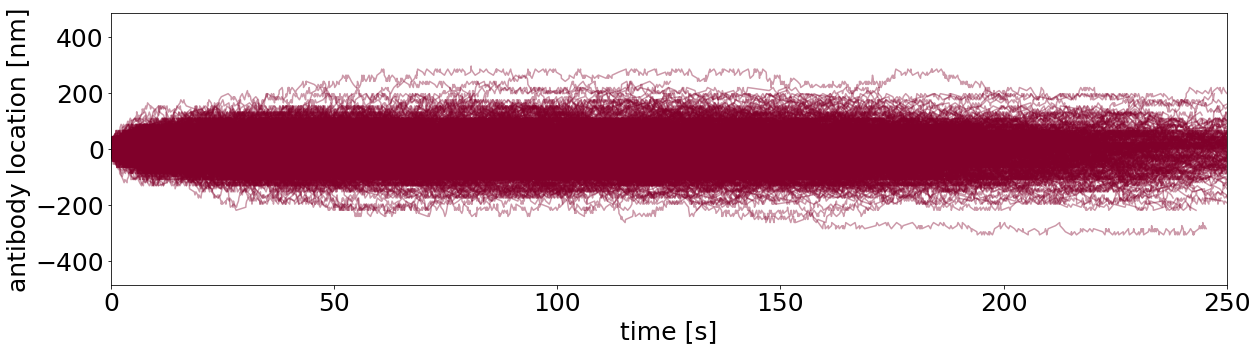

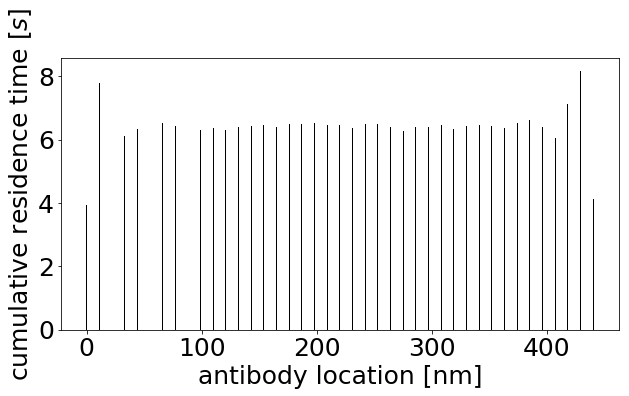

('average velocity: ', -0.06309393151775455)


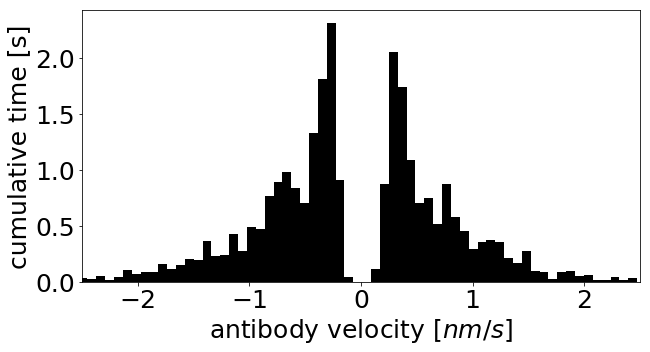

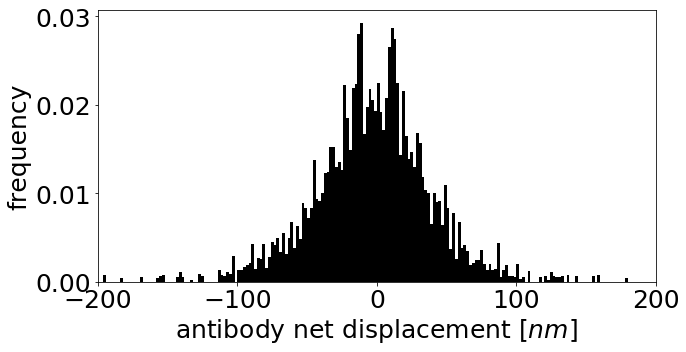

('average net displacement: ', -2.5713691299356327)


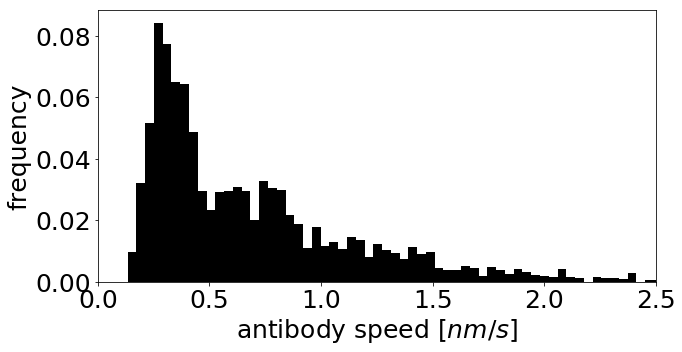

<Figure size 1440x360 with 0 Axes>

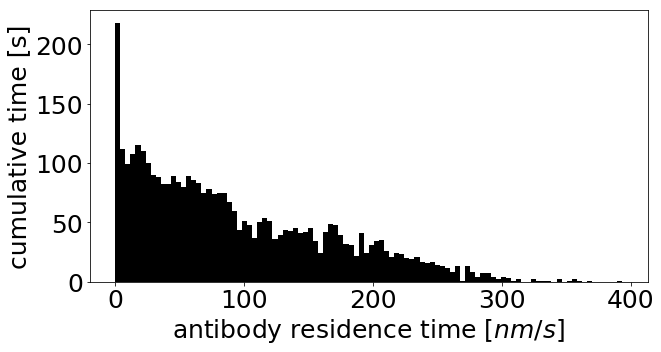

In [12]:

imp.reload(mc)
experiment = 30
print(name_list[experiment],coordinates_list[experiment])
# box_size=np.max(np.cumsum(np.arange(15,25,.5)))+24
# box_size=np.max(np.cumsum(np.arange(15,25,.2)))+25
box_size = np.max(coordinates_list[experiment])+22+25
# box_size = np.max(coordinates_list[experiment])+10
origami = mc.Pattern(name = name_list[experiment],coordinates = np.array(coordinates_list[experiment]))
distance_matrix = origami.configure_ab_ag_system_pbc(cutoff_distance = 25, box_size=box_size)
origami.output_site_configuration()
dir = mc.get_save_directory(name = origami.name)
final_time = 10000
times = np.array([0, final_time])
concentrations = np.array([.25e-9])
origami.program_kinetics(times, concentrations)
origami.initialize_antibody_environment([0.02132598797*10**9,0.0005306938,2.66927399416,0.19781887754],dir)
repeats = 100
origami.multirun(repeats)
mc.analyze_ab_position(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
mc.analyze_ab_residence_times(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
# mc.analyze_ab_position(name_list[experiment], 2, coordinates_list[experiment],box_size)

  0%|          | 0/100 [00:00<?, ?it/s]

('short_spacing', [[0, 0], [0, 10.0], [0, 20.0], [0, 30.0], [0, 40.0], [0, 50.0], [0, 60.0], [0, 70.0], [0, 80.0], [0, 90.0], [0, 100.0], [0, 110.0], [0, 120.0], [0, 130.0], [0, 140.0], [0, 150.0], [0, 160.0], [0, 170.0], [0, 180.0], [0, 190.0], [0, 200.0]])
short_spacing


100%|██████████| 100/100 [39:32<00:00, 23.73s/it]


<Figure size 1440x360 with 0 Axes>

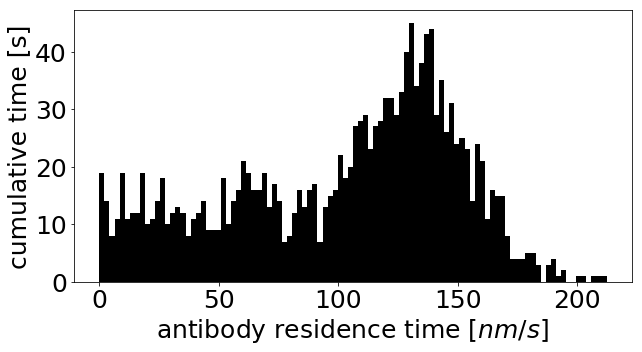

In [13]:
# gradient short #####
imp.reload(mc)
experiment = 31
print(name_list[experiment],coordinates_list[experiment])
# box_size=np.max(np.cumsum(np.arange(15,25,.5)))+24
# box_size=np.max(np.cumsum(np.arange(15,25,.2)))+25
box_size = np.max(coordinates_list[experiment])+10+25
# box_size = np.max(coordinates_list[experiment])+10
origami = mc.Pattern(name = name_list[experiment],coordinates = np.array(coordinates_list[experiment]))
distance_matrix = origami.configure_ab_ag_system_pbc(cutoff_distance = 11, box_size=box_size)
origami.output_site_configuration()
dir = mc.get_save_directory(name = origami.name)
final_time = 10000
times = np.array([0, final_time])
concentrations = np.array([.25e-9])
origami.program_kinetics(times, concentrations)
origami.initialize_antibody_environment([0.02132598797*10**9,0.0005306938,2.66927399416,0.19781887754],dir)
repeats = 100
origami.multirun(repeats)
# mc.analyze_ab_position(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
mc.analyze_ab_residence_times(name_list[experiment], range(1,repeats), coordinates_list[experiment],box_size)
# mc.analyze_ab_position(name_list[experiment], 2, coordinates_list[experiment],box_size)

In [1]:
# mc.stratified_spr_plots(name_list[experiment], origami.time_points[-1])

array([1, 3, 6])